## 掃流砂量式

### 芦田・道上式

$$
\begin{align}
 \frac{q_b}{\sqrt{\rho_{sw} g d^3}} &= 17 \tau_{*e}^{3/2}\left(1-\frac{\tau_{* c}}{\tau_*}\right)\left(1-\sqrt{\frac{\tau_{* c}}{\tau_*}}\right) \\
 \tau_{* e} &= \frac{u_{*e}^2}{\rho_{sw} g d} \\
\dfrac{V}{u_{*e}} &= \dfrac{1}{\kappa}\log_e{\dfrac{h}{k_s}} - \dfrac{1}{\kappa} + A_r   \\
k_s &=  d(1+2\tau_*) \\
\kappa &= 0.4 , A_r = 8.5 \\
\end{align}
$$

ここに、$q_b$：掃流砂量、$\rho_{sw}$：砂の水中比重、$d$：(平均)粒径、$\tau_{*e}$：有効無次元掃流力、$\tau_{*c}$：無次元限界掃流力、$\tau_*$：無次元掃流力、$V$：水深平均流速、$h$：水深を示す。

$\tau_{*c}$は岩垣の式で算出する。

### MPM式

$$
\begin{align}
\frac{q_b}{\sqrt{\rho_{sw} g d^3}} &= 8\left(\tau_{*e} - \tau_{*c} \right)^{3 / 2} \\
\tau_{*c} &=0.047  \\
\tau_{*e}&= \tau_* \left(\frac{n_b}{n}\right)^{3 / 2} \\
 n_b&=0.0192 d_{90}{ }^{1 / 6}
\end{align}
$$

ここに、$q_b$：掃流砂量、$\rho_{sw}$：砂の水中比重、$d$：(平均)粒径、$d_{90}$：(平均)粒径、$\tau_{*e}$：有効無次元掃流力、$\tau_{*c}$：無次元限界掃流力、$\tau_*$：無次元掃流力、$n$：マニングの粗度係数を示す。


# 有効掃流力について

有効無次元掃流力と無次元掃流力の関係について、上記の芦田・道上式での計算式を用いて図化する。

なお、流速はマニング則により算出する。マニングの粗度係数は0.025、水深は5.0m、粒径は5mmとする。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def amtaud(tauss, Rbyd, d, n):
    
    def subtaud(taus):
        g = 9.8
        Ar = 8.5
        kappa = 0.4
        ie = taus/Rbyd/1.65
        R = Rbyd*d
        U = ie**0.5*R**(2/3)/n
        
        if np.log(Rbyd/(1.0 + 2.0*taus)) < 1.0:
            phi = Ar
        else:
            phi = (np.log(Rbyd/(1+2.0*taus))-1)/kappa + Ar
        
        Ue = U/phi
        taue = Ue**2/1.65/g/d
        
        return taue

    return np.array([subtaud(p) for p in tauss])


taus = np.logspace(-1.3,1.3,num=100,endpoint=True,base=10.0)
tause = amtaud(taus, 5.0/0.005,0.005,0.025)

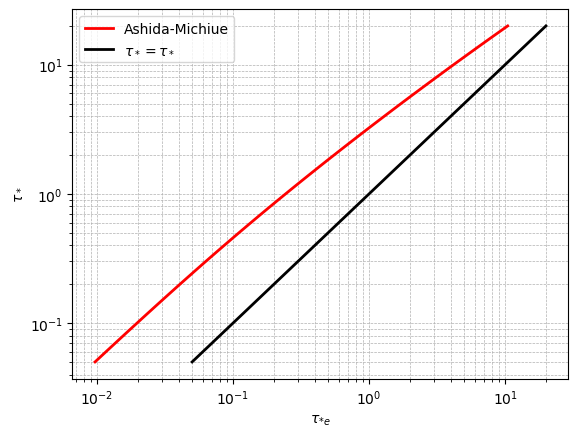

In [22]:
fig, ax = plt.subplots()
ax.plot(tause, taus, 'r-', label='Ashida-Michiue', lw=2)
ax.plot(taus, taus, 'k-', label='$\\tau_*=\\tau_*$', lw=2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\\tau_{*e}$')
ax.set_ylabel('$\\tau_*$')
ax.grid(which='both', linestyle='--', lw=0.5)
ax.legend(loc='best')

 ヒント

 - 有効無次元掃流力は無次元掃流力よりも小さくなる。
 - 無次元掃流力が大きいほど、有効無次元掃流力との差が小さくなる。